# Kazniva dejanja glede na vrsto kriminala

Pridobivanje podatkov

In [2]:
import pandas as pd
import glob
import warnings
import platform
from copy import copy
warnings.filterwarnings('ignore')

if (platform.system() == 'Windows'):
    l = glob.glob('data/*.csv')
    for i in range(len(l)):
        l[i] = l[i].split('\\')[-1].upper()

    # slovar poti do .csv datotek 
    csv_data = {data.split('\\')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}
    
    # MAC IN LINUX IMATA DRUGACNE OZNAKE
else:
    l = glob.glob('data/*.csv')
    for i in range(len(l)):
        l[i] = l[i].split('/')[-1].upper()

    # slovar poti do .csv datotek 
    csv_data = {data.split('/')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}

In [3]:
dataframes = {}
for key, value in csv_data.items():
    df = pd.read_csv(csv_data[key], sep=';', encoding='cp1250', skipinitialspace = True)
    dataframes[key.upper()] = df

for df1 in dataframes.values():
    df1.columns = ['MesecStoritve' if x == 'DatumStoritve' else x for x in df]

In [4]:
dataframes_copy = copy(dataframes)
#TODO: make a function that merges all dataframes into one dataframe
frames = [copy(dataframes_copy['KD2009'])]
for i in range(10, 21):
    frames.append(copy(dataframes_copy['KD20'+str(i)]))

all_data = pd.concat(frames)
all_data

# tu se naredi preslikava glede iz neberljive oblike datuma v berljivo obliko
mesci = ['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij', 'Avgust', 'September', 'Oktober', 'November', 'December']
mesci2 = []
leta = []

# this dataframe is the one used for the analysis
full_KD = all_data
full_KD

for i in full_KD['MesecStoritve']:
    mesec = str(i)[:-4]
    leto = str(i)[-4:]

    leta.append(leto)
    mesci2.append(mesci[int(mesec) - 1])


full_KD.rename(columns={'MesecStoritve': 'CasovnaOznaka'}, inplace=True)
full_KD['MesecStoritve'] = mesci2
full_KD['LetoStoritve'] = leta

full_KD['LetoStoritve'] = full_KD['LetoStoritve'].astype(int)

In [5]:
color_pallete = ['#FF0170', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#82D8F2']

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

crime_type_dataframes = {k:v for k,v in dataframes.items()}
crime_type_count = {}
df_add = None
df_add_all_years = []
y_list = []
colors = ['#FF0170', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#82D8F2']

for key, value in crime_type_dataframes.items():
    df1 = copy(crime_type_dataframes[key])
    df1["Test"] = df1[['GospodarskiKriminal', 'OrganiziranKriminal', 'MladoletniskaKriminaliteta']].stack().groupby(level=0).agg(' '.join)
    y_list.append([df1["Test"].value_counts()[0],df1["Test"].value_counts()[1],df1["Test"].value_counts()[2],df1["Test"].value_counts()[3],df1["Test"].value_counts()[4],df1["Test"].value_counts()[5],df1["Test"].value_counts()[6]])
    if (df_add is None):
        df_add = copy(df1["Test"])
        crime_type_date_count = dict(zip(df_add.value_counts().index.tolist(), [0] * len(df_add.value_counts().index.tolist())))
        crime_type_date_sum = dict(zip(df_add.value_counts().index.tolist(), [0] * len(df_add.value_counts().index.tolist())))
        crime_type_date_avg = dict.fromkeys(df_add.value_counts().index.tolist())
    else:
        df_add = df_add.append(df1["Test"], ignore_index=True)
    df_add_all_years.append(df1)
    for col1, col2 in zip(df1["MesecStoritve"], df1["Test"]):
        #print(str(col1)[-4:], col2)
        #print(int(key[-4:]), col1)
        crime_type_date_sum[col2] += (int(key[-4:]) - int(str(col1)[-4:]))
        crime_type_date_count[col2] += 1

# Stevilo kaznivih dejanj glede na vrsto za vsa leta

        
# Stevilo zaključenih kaznivih dejanj glede na vrsto za leta 2009-2020



In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt

seznam_PU = full_KD.PUStoritveKD.value_counts()

stevilo = [seznam_PU["PU KRANJ"], seznam_PU["PU NOVA GORICA"], seznam_PU["PU NOVO MESTO"], 0, 0, seznam_PU["PU KOPER"], seznam_PU["PU LJUBLJANA"]+seznam_PU["GPU"]
            , 0, seznam_PU["PU MARIBOR"], 0, seznam_PU["PU MURSKA SOBOTA"], 0]


### Prikaz pogostosti kriminala glede na splošno in gospodarsko vrsto

V tem primeru imamo imamo v samih podatkih stolpcev `GospodarskiKriminal` ki označuje vrsto kriminala glede na to ali je ta splošne ali pa gospodarkse vrste. 

In [52]:
celota = full_KD.groupby("PUStoritveKD", sort=False).GospodarskiKriminal.value_counts()
celota_popravljeno = celota.drop(['DIREKTORAT ZA UPRAVNE NOTRANJE ZADEVE', 'NI PODATKA'])
stevilo_GOSPODARSKA = [celota_popravljeno[11], celota_popravljeno[13], celota_popravljeno[7], 0, 0, celota_popravljeno[9], celota_popravljeno[3]+celota_popravljeno[17]
            , 0, celota_popravljeno[5], celota_popravljeno[1], celota_popravljeno[15], 0]
stevilo_SPLOSNA =  [celota_popravljeno[10], celota_popravljeno[12], celota_popravljeno[6], 0, 0, celota_popravljeno[8], celota_popravljeno[2]+celota_popravljeno[16]
            , 0, celota_popravljeno[4], celota_popravljeno[0], celota_popravljeno[14], 0]

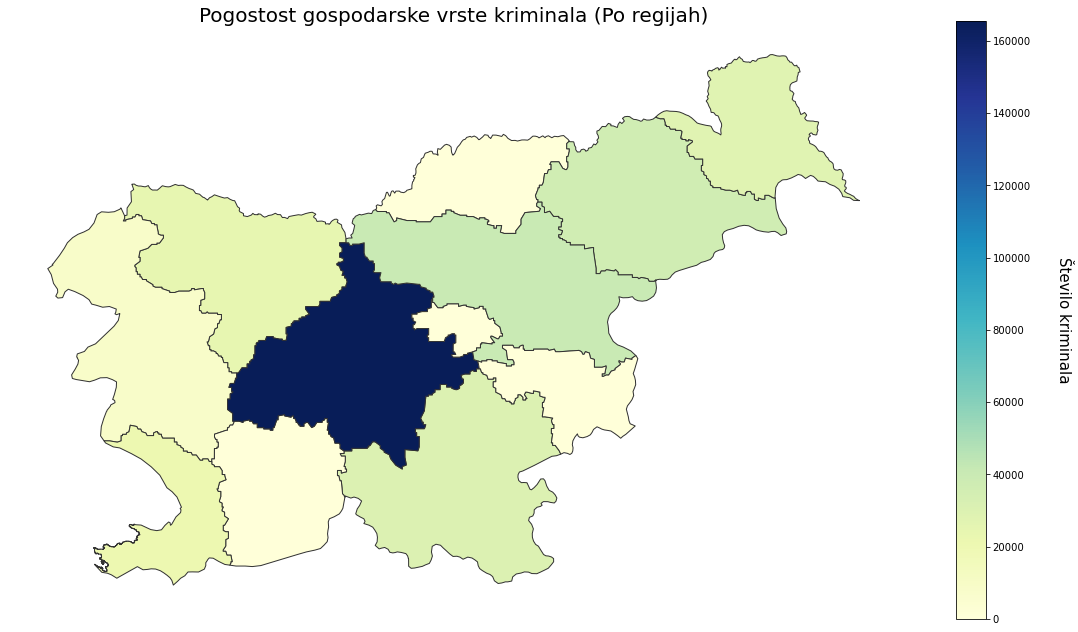

In [35]:
slovenia = gpd.read_file('slovenija_map/regije/reg.shp', encoding='cp1250')

slovenia['stevilo'] = stevilo_GOSPODARSKA
fig, ax = plt.subplots(1, figsize=(20, 20))
plt.axis('off')
plt.title('Pogostost gospodarske vrste kriminala (Po regijah)', fontsize=20)
slovenia.plot(column='stevilo', cmap='YlGnBu', ax=ax, edgecolor='.2')
bar_info = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=0, vmax=max(stevilo_GOSPODARSKA)))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink=0.55)
cbar.set_label('Število kriminala', fontsize=15, rotation=270, labelpad=40)

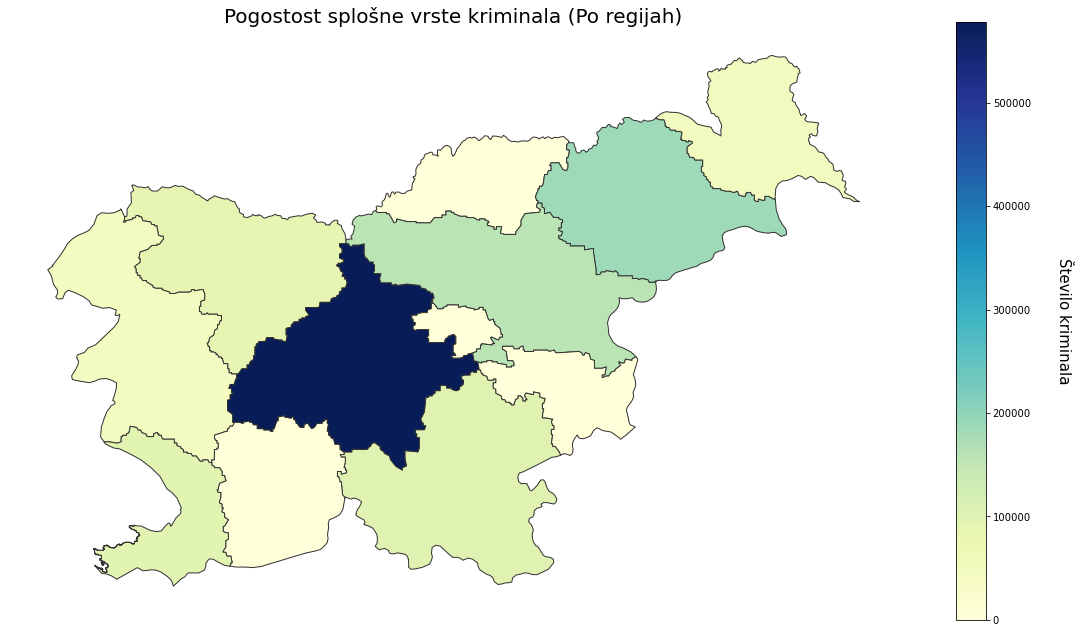

In [36]:
slovenia = gpd.read_file('slovenija_map/regije/reg.shp', encoding='cp1250')

slovenia['stevilo'] = stevilo_SPLOSNA
fig, ax = plt.subplots(1, figsize=(20, 20))
plt.axis('off')
plt.title('Pogostost splošne vrste kriminala (Po regijah)', fontsize=20)
slovenia.plot(column='stevilo', cmap='YlGnBu', ax=ax, edgecolor='.2')
bar_info = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=0, vmax=max(stevilo_SPLOSNA)))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink=0.55)
cbar.set_label('Število kriminala', fontsize=15, rotation=270, labelpad=40)

**Ugotovitve:** iz obeh grafov lahko razberemo zanimive vzorce. Pri obeh lahko opazimo, da je orednjeslovenska regija žarišče kaznivih dejanj, ne glede na vrsto. V vseh ostalih regijah pa se grafa razlikujeta. Prav tako je splošnega kriminala bistveno več, kot pa gospodarskega.

### Prikaz pogostosti kriminala glede na mladoletniško vrsto

In [50]:
celota = full_KD.groupby("PUStoritveKD", sort=False).MladoletniskaKriminaliteta.value_counts()
celota_popravljeno = celota.drop(['NI PODATKA'])
stevilo_MLADOLETNISKA = [celota_popravljeno[5], celota_popravljeno[6], celota_popravljeno[3], 0, 0, celota_popravljeno[5], celota_popravljeno[2]+celota_popravljeno[8]
            , 0, celota_popravljeno[2], celota_popravljeno[0], celota_popravljeno[7], 0]

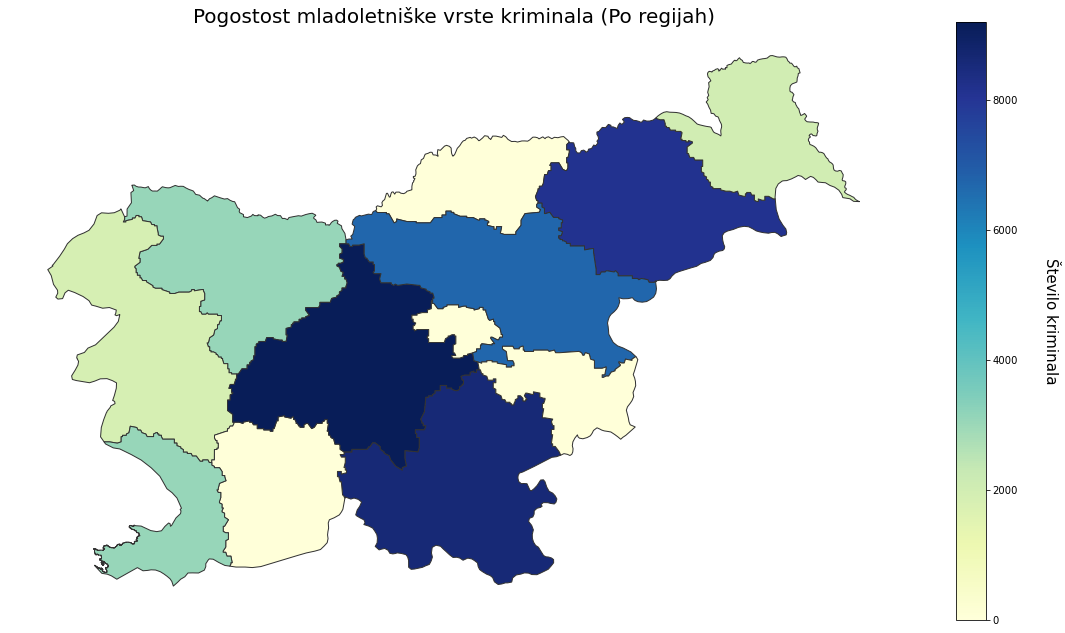

In [51]:
slovenia = gpd.read_file('slovenija_map/regije/reg.shp', encoding='cp1250')

slovenia['stevilo'] = stevilo_MLADOLETNISKA
fig, ax = plt.subplots(1, figsize=(20, 20))
plt.axis('off')
plt.title('Pogostost mladoletniške vrste kriminala (Po regijah)', fontsize=20)
slovenia.plot(column='stevilo', cmap='YlGnBu', ax=ax, edgecolor='.2')
bar_info = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=0, vmax=max(stevilo_MLADOLETNISKA)))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink=0.55)
cbar.set_label('Število kriminala', fontsize=15, rotation=270, labelpad=40)

**Ugotovitve:** čeprav je število mladoletniškega kriminala precej manjše od števila splošnih in gospodarskih kaznivih dejanj, se v tem primeru graf glede pogostoti precej razlikuje od prejšnjih dveh. V osnovi je osrednjeslovenska regija obarvana enako kot prej, medtem ko jugovzhodna, savinjska in podravska regija v primerjavi z prejšnjimi grafi izstopajo, saj so vse tri obarvane modro, podobno kot osrednjeslovenska.